<a href="https://colab.research.google.com/github/iMan0405/Portfolio_DT_vs_AI/blob/main/a_model_that_detects_dead_and_green_leaves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from fastai.vision.all import *
from ipywidgets import widgets

In [2]:
path = Path('/content/drive/MyDrive/dry and green leaf dataset')
path.ls()
fls = get_image_files(path)
fls

(#1857) [Path('/content/drive/MyDrive/dry and green leaf dataset/dry leaf/image10.jpeg'),Path('/content/drive/MyDrive/dry and green leaf dataset/dry leaf/images267.jpg'),Path('/content/drive/MyDrive/dry and green leaf dataset/dry leaf/images180.jpg'),Path('/content/drive/MyDrive/dry and green leaf dataset/dry leaf/images238.jpg'),Path('/content/drive/MyDrive/dry and green leaf dataset/dry leaf/images100.jpg'),Path('/content/drive/MyDrive/dry and green leaf dataset/dry leaf/images230.jpg'),Path('/content/drive/MyDrive/dry and green leaf dataset/dry leaf/images120.jpg'),Path('/content/drive/MyDrive/dry and green leaf dataset/dry leaf/images70.jpg'),Path('/content/drive/MyDrive/dry and green leaf dataset/dry leaf/images69.jpg'),Path('/content/drive/MyDrive/dry and green leaf dataset/dry leaf/images50.jpg')...]

In [3]:
failed = verify_images(path)
failed

'PosixPath' object is not iterable


(#0) []

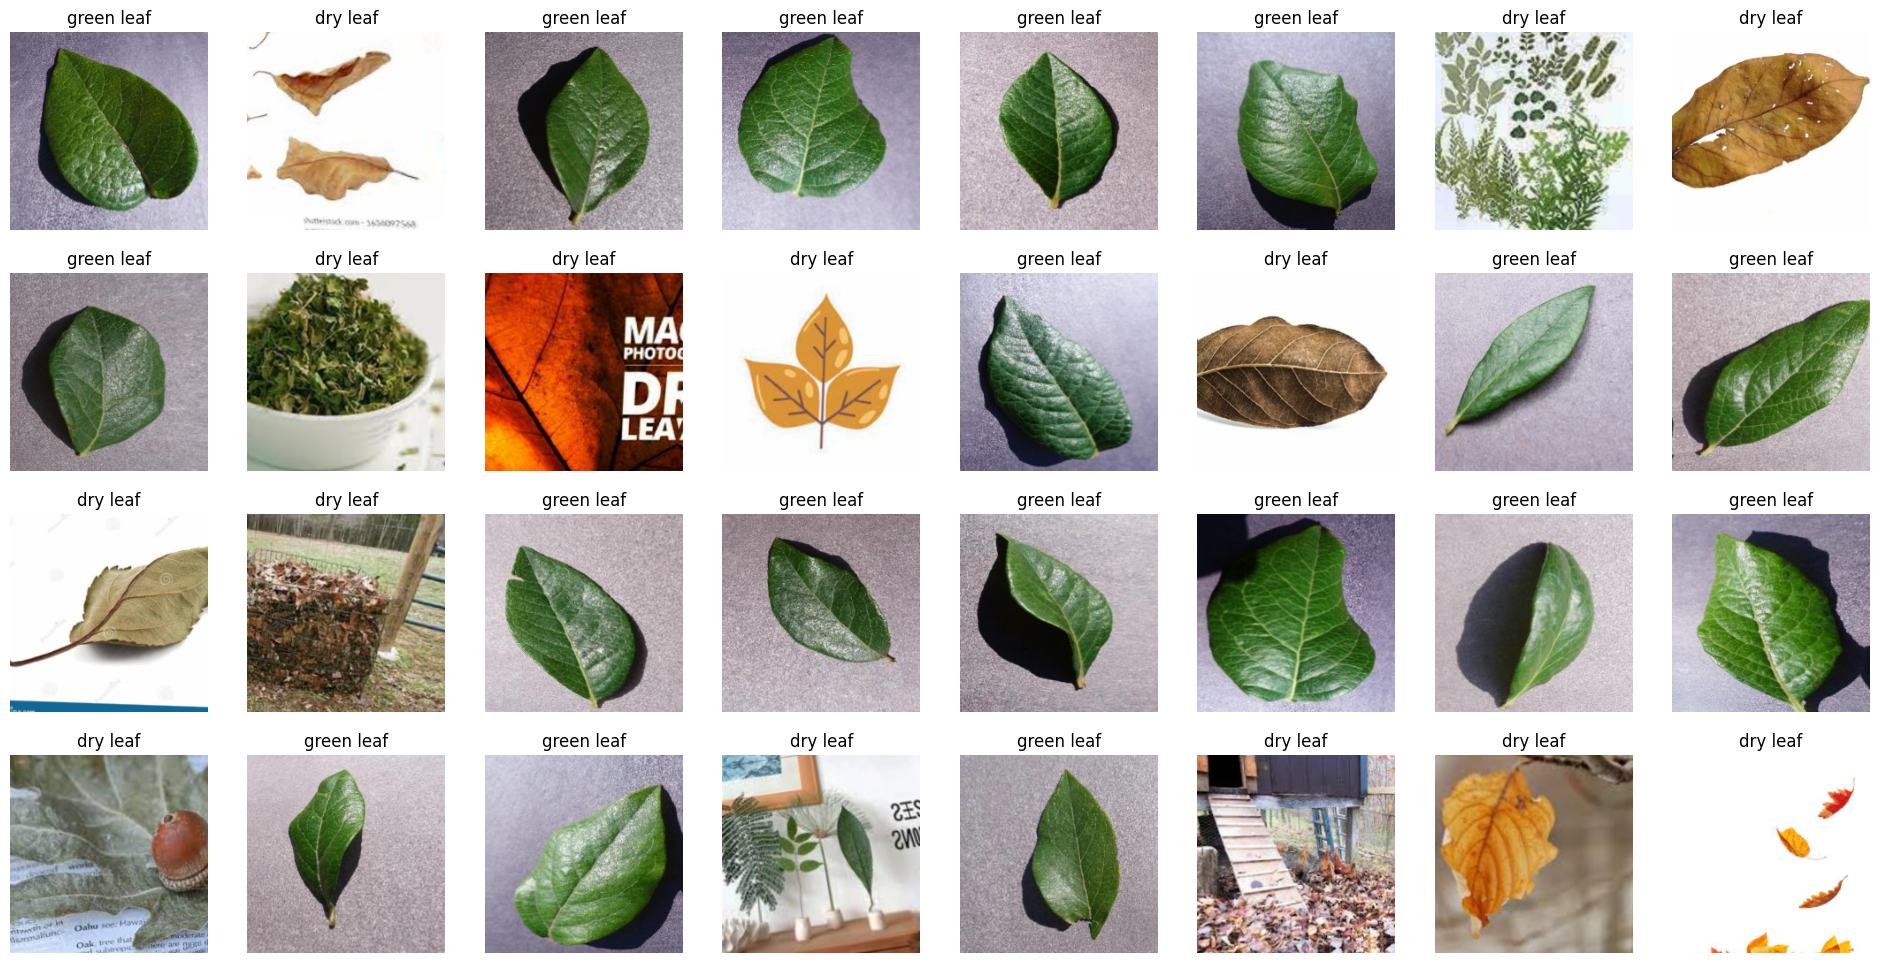

In [4]:
#DataBlock yaratamiz

transports = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    get_y = parent_label,
    splitter = RandomSplitter(valid_pct=0.2),
    item_tfms = Resize(460),
    batch_tfms=[*aug_transforms(size=224), Normalize.from_stats(*imagenet_stats)]
)

#Dataloader yaratamiz

dls = transports.dataloaders(path)

#Datasetni tekshiramiz

dls.train.show_batch(max_n=32, nrows=4)

In [5]:
#Train
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(10)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 47.4MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.196704,0.000228,1.000000,04:44


epoch,train_loss,valid_loss,accuracy,time
0,0.005081,0.000362,1.000000,00:19
1,0.010175,0.000005,1.000000,00:20
2,0.008036,0.000072,1.000000,00:19
3,0.004588,0.000124,1.000000,00:19
4,0.004351,0.000319,1.000000,00:20
5,0.005201,0.000003,1.000000,00:19
6,0.003578,0.000023,1.000000,00:20
7,0.002769,0.000001,1.000000,00:21
8,0.001732,0.000002,1.000000,00:19
9,0.001092,0.000006,1.000000,00:20


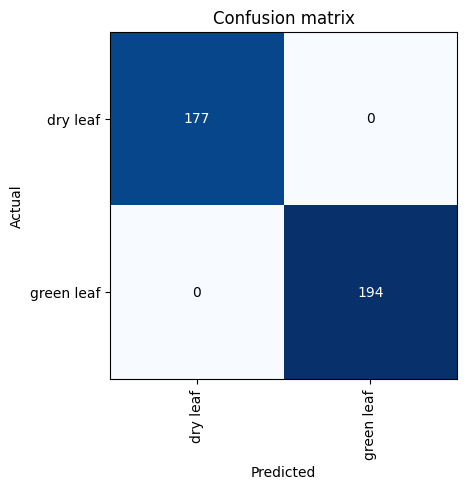

In [6]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

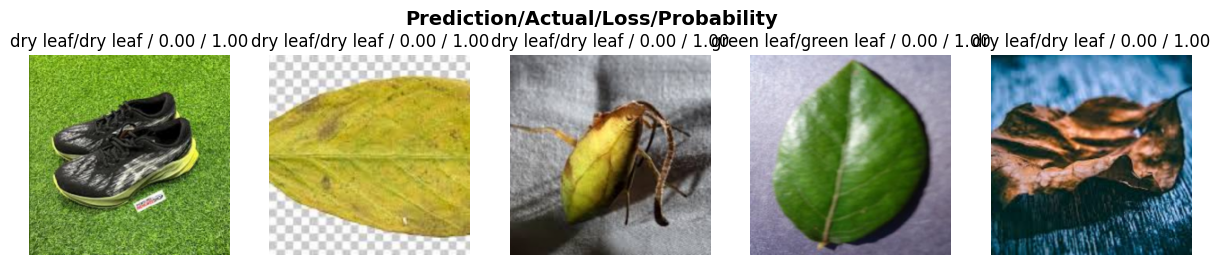

In [7]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
upload = widgets.FileUpload()
upload